# Analyse data
From https://github.com/alex-d-bondarev/neu-capstone

## Data preparation

### Load libraries
Need to import libraries **only once** each time jupiter notebook is launched

In [1]:
import pandas

from ipyfilechooser import FileChooser

import sys 
import os

abs_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, abs_path)

from src.common_helpers import make_text_pandas_header_compatible
from src.extended_pandas_series import ExtendedSeries
from src.plot_helpers import plot_bar_chart, plot_1_10_hist_chart, plot_text_answer, plot_multichoice_with_other


### Read the file

In [2]:
# open excel file as pandas dataframe
file_path = "/Users/obondarev/work/github/neu-capstone/Northeastern x Big Sky - Franchise Research Survey.xlsx"

raw_df = pandas.read_excel(io=file_path,
                           sheet_name='Form1')

# remove illegal characters from column names
headers_list = raw_df.columns.values.tolist()
headers_list = list(map(make_text_pandas_header_compatible, headers_list))
raw_df.columns = headers_list

necessary_columns = [
    'Have you hired Big Sky Franchise Team',
    'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely',
    'If you were to do it all over would you hire Big Sky again',
    'If no could you please tell why',
    'What year did you start franchising',
    'How many total franchises have you sold since you started franchisingif not applicable enter NA',
    'How many franchises did you sell in your first yearif not applicable enter NA',
    'How many franchises did you sell in your second year if not applicable enter NA',
    'How many franchises did you sell in your third yearif not applicable enter NA',
    'What were your biggest challenges or obstacles to launching your franchise program',
    'What were your biggest challenges to selling franchises',
    'What have been your biggest challenges in supporting your franchisees select all that apply2',
    'What areas do you need help with Select all that apply',
    'Would you like to participate in an optional interview to share more insights',
    'Please share your email so that we may contact you for an optional interview Leave empty if you prefer to be anonymous',
    'Business Name Leave empty if you prefer to be anonymous',
]

df = raw_df.filter(items=necessary_columns, axis=1)


## General survey analysis

### 1. Have you hired Big Sky Franchise Team?

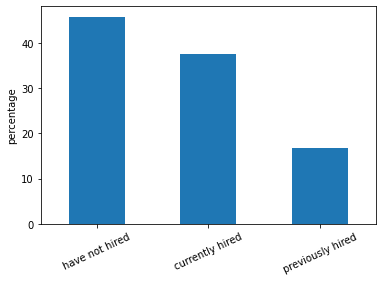

In [16]:
column_name = 'Have you hired Big Sky Franchise Team'
plot_bar_chart(df[column_name])

### 2. How likely would you recommend Big Sky Franchise Team to a friend or colleague? 

Mean value is 9.2


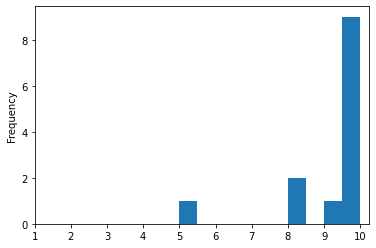

In [15]:
column_name = 'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely'
plot_1_10_hist_chart(df[column_name])

### 3. If you were to do it all over, would you hire Big Sky again?

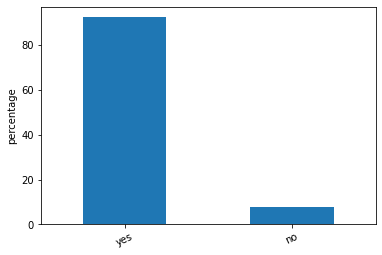

In [14]:
column_name = 'If you were to do it all over would you hire Big Sky again'
plot_bar_chart(ExtendedSeries(df[column_name]).filter_out_nan())

### 4. If no, could you please tell why?

All keywords:
Counter({'na': 23, 'company': 1, 'direction': 1, 'lot': 1, 'mentors': 1, 'money': 1, 'time': 1, 'years': 1})


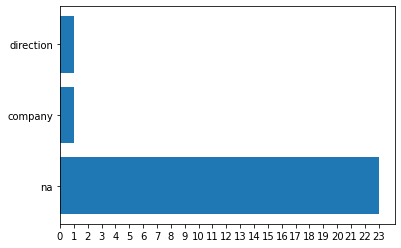

In [13]:
column_name = 'If no could you please tell why'
plot_text_answer(df[column_name], top=3)

### 5. What year did you start franchising?

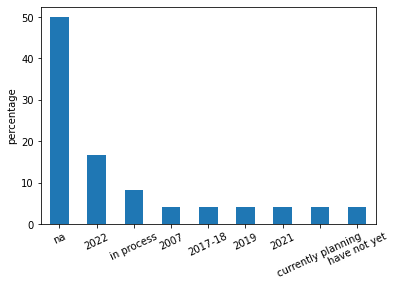

In [12]:
column_name = 'What year did you start franchising'
plot_bar_chart(df[column_name])

### 6. How many total franchises have you sold sold since you started franchising?

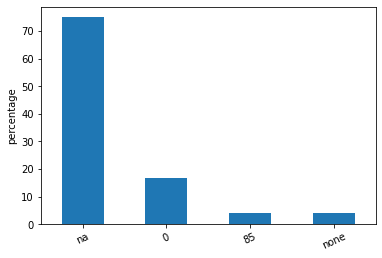

In [6]:
column_name = 'How many total franchises have you sold since you started franchisingif not applicable enter NA'
plot_bar_chart(df[column_name])

### 7. How many franchises did you sell in your first year?

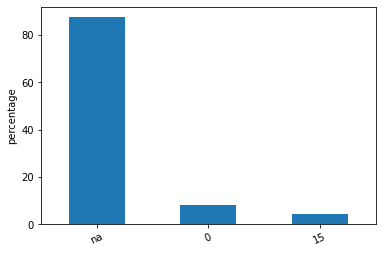

In [5]:
column_name = 'How many franchises did you sell in your first yearif not applicable enter NA'
plot_bar_chart(df[column_name])

### 8. How many franchises did you sell in your second year?

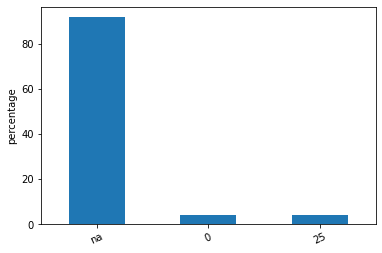

In [3]:
column_name = 'How many franchises did you sell in your second year if not applicable enter NA'
plot_bar_chart(df[column_name])

### 9. How many franchises did you sell in your third year?

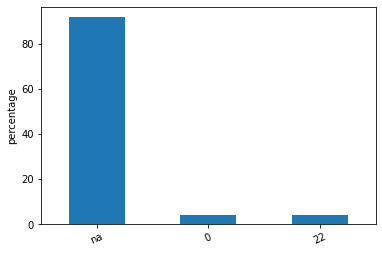

In [4]:
column_name = 'How many franchises did you sell in your third yearif not applicable enter NA'
plot_bar_chart(df[column_name])

### 10. What were your biggest challenges or obstacles to launching your franchise program?

All keywords:
Counter({'na': 14, 'budget': 2, 'consultant': 1, 'franchise': 1, 'pandemic': 1, 'documents': 1, 'brand': 1, 'house': 1, 'person': 1, 'fdd': 1, 'marketing': 1, 'process': 1, 'set': 1, 'franchises': 1, 'numbers': 1, 'partner': 1, 'program': 1, 'workload': 1})


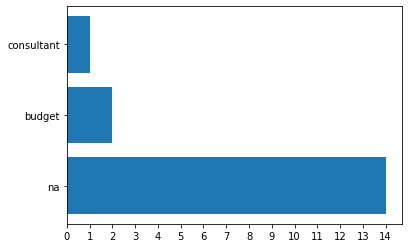

In [8]:
column_name = 'What were your biggest challenges or obstacles to launching your franchise program'
plot_text_answer(df[column_name], top=3)

### 11. What were your biggest challenges to selling franchises?

All keywords:
Counter({'na': 19, 'generation': 1, 'lead': 1, 'deals': 1, 'validation': 1, 'phase': 1, 'partner': 1, 'game': 1, 'leads': 1, 'money': 1, 'numbers': 1, 'sale': 1})


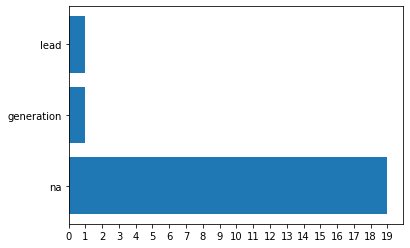

In [9]:
column_name = 'What were your biggest challenges to selling franchises'
plot_text_answer(df[column_name], top=3)

### 12. What have been your biggest challenges in supporting your franchisees

All keywords:
Counter({'no_response': 9, 'na': 6, 'answer': 1, 'partners': 1})


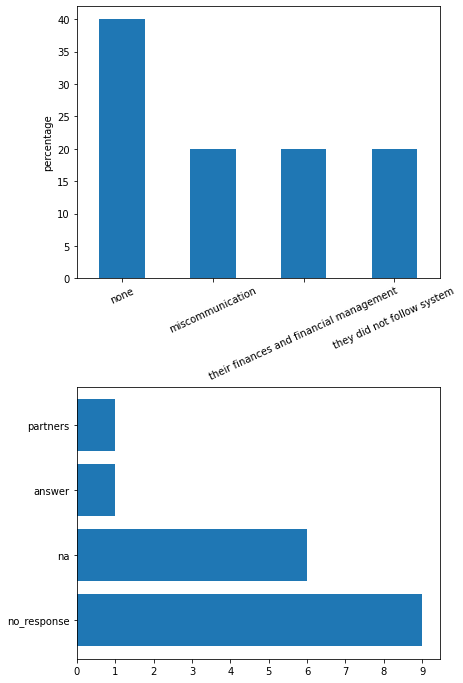

In [10]:
column_name = 'What have been your biggest challenges in supporting your franchisees select all that apply2'
expected_values = [
	'None', 'Their motivation', 'They did not follow system', 'Their finances and financial management', 
	'Lack of marketing spend by franchisee', 'Quality issues', 
	'My (or franchisor) coaching skills', 'Miscommunication'
]
plot_multichoice_with_other(series=df[column_name], main_values=expected_values, top=5)

### 13. What areas do you need help with?

All keywords:
Counter({'no_response': 11, 'business': 1, 'destruction': 1})


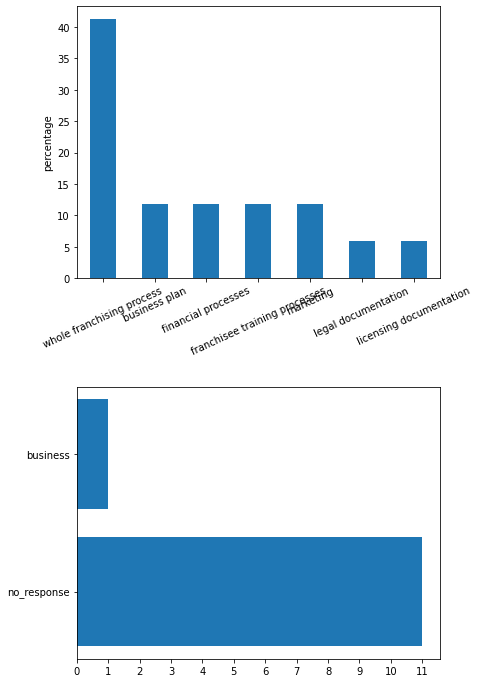

In [11]:
column_name = 'What areas do you need help with Select all that apply'
expected_values = [
	'None', 'Whole franchising process', 'Business plan', 'Financial processes', 
	'Competitors analysis', 'Legal documentation', 'Licensing documentation', 
	'Marketing', 'Quality Assurance', 'Franchisee training processes', 'Technical support'
]
plot_multichoice_with_other(series=df[column_name], main_values=expected_values, top=2)

### 14/15/16. Private data

# Analyse non-clients

In [20]:
column_name = 'Have you hired Big Sky Franchise Team'
non_df = df[df[column_name] == 'Have not hired']

### 13. What areas do you need help with?

All keywords:
Counter({'no_response': 11, 'business': 1, 'destruction': 1})


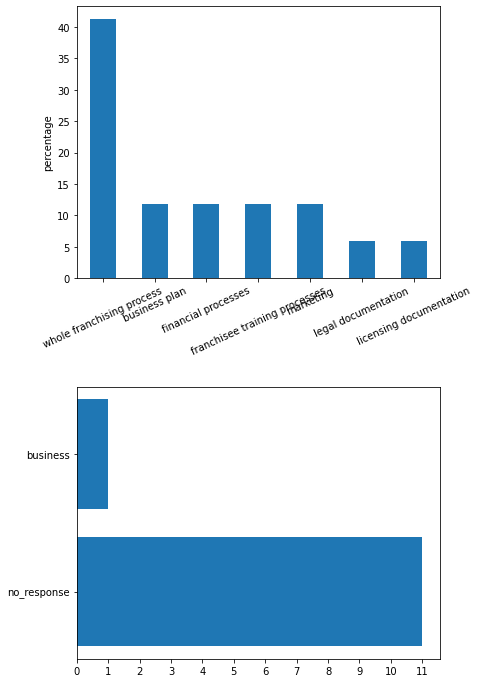

In [21]:
column_name = 'What areas do you need help with Select all that apply'
expected_values = [
	'None', 'Whole franchising process', 'Business plan', 'Financial processes', 
	'Competitors analysis', 'Legal documentation', 'Licensing documentation', 
	'Marketing', 'Quality Assurance', 'Franchisee training processes', 'Technical support'
]
plot_multichoice_with_other(series=non_df[column_name], main_values=expected_values, top=2)

## Analyse past clients

In [34]:
column_name = 'Have you hired Big Sky Franchise Team'
past_df = df[df[column_name] == 'Previously hired']

### 2. How likely would you recommend Big Sky Franchise Team to a friend or colleague? 

Mean value is 8.8


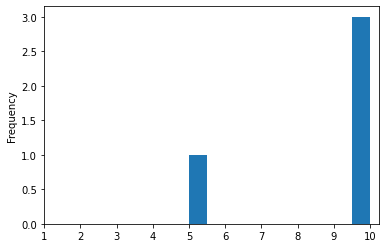

In [35]:
column_name = 'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely'
plot_1_10_hist_chart(past_df[column_name])

### 3. If you were to do it all over, would you hire Big Sky again?

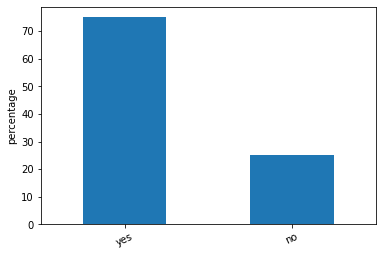

In [27]:
column_name = 'If you were to do it all over would you hire Big Sky again'
plot_bar_chart(ExtendedSeries(past_df[column_name]).filter_out_nan())

### 4. If no, could you please tell why?

All keywords:
Counter({'na': 3, 'company': 1, 'direction': 1, 'lot': 1, 'mentors': 1, 'money': 1, 'time': 1, 'years': 1})


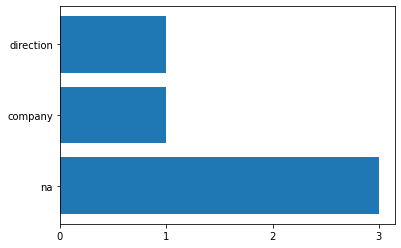

In [28]:
column_name = 'If no could you please tell why'
plot_text_answer(past_df[column_name], top=3)

### 5. What year did you start franchising?

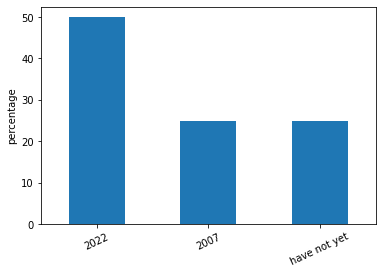

In [36]:
column_name = 'What year did you start franchising'
plot_bar_chart(past_df[column_name])

### 6. How many total franchises have you sold sold since you started franchising?

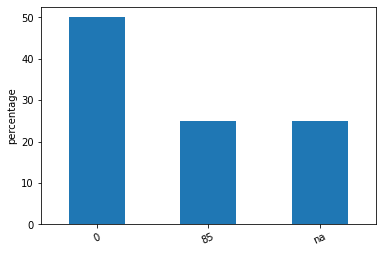

In [37]:
column_name = 'How many total franchises have you sold since you started franchisingif not applicable enter NA'
plot_bar_chart(past_df[column_name])

### 10. What were your biggest challenges or obstacles to launching your franchise program?

All keywords:
Counter({'pandemic': 1, 'budget': 1, 'fdd': 1, 'marketing': 1, 'franchises': 1, 'numbers': 1, 'partner': 1, 'na': 1})


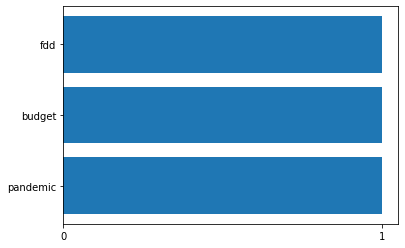

In [38]:
column_name = 'What were your biggest challenges or obstacles to launching your franchise program'
plot_text_answer(past_df[column_name], top=3)

### 11. What were your biggest challenges to selling franchises?

All keywords:
Counter({'na': 1, 'deals': 1, 'validation': 1, 'partner': 1, 'game': 1, 'leads': 1, 'money': 1, 'numbers': 1, 'sale': 1})


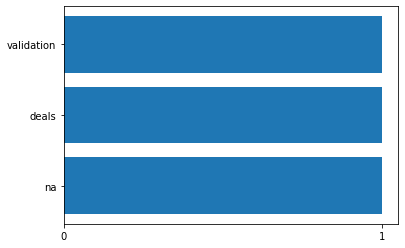

In [40]:
column_name = 'What were your biggest challenges to selling franchises'
plot_text_answer(past_df[column_name], top=3)

### 12. What have been your biggest challenges in supporting your franchisees

All keywords:
Counter({'no_response': 3, 'na': 1})


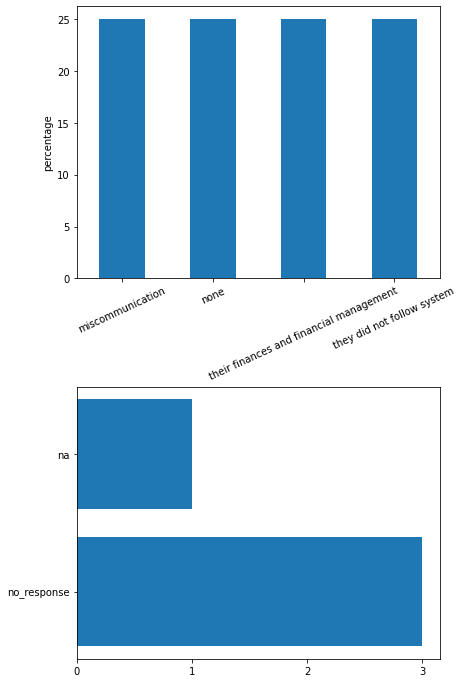

In [43]:
column_name = 'What have been your biggest challenges in supporting your franchisees select all that apply2'
expected_values = [
	'None', 'Their motivation', 'They did not follow system', 'Their finances and financial management', 
	'Lack of marketing spend by franchisee', 'Quality issues', 
	'My (or franchisor) coaching skills', 'Miscommunication'
]
plot_multichoice_with_other(series=past_df[column_name], main_values=expected_values, top=5)

### 13. What areas do you need help with?

No Data for bar chart


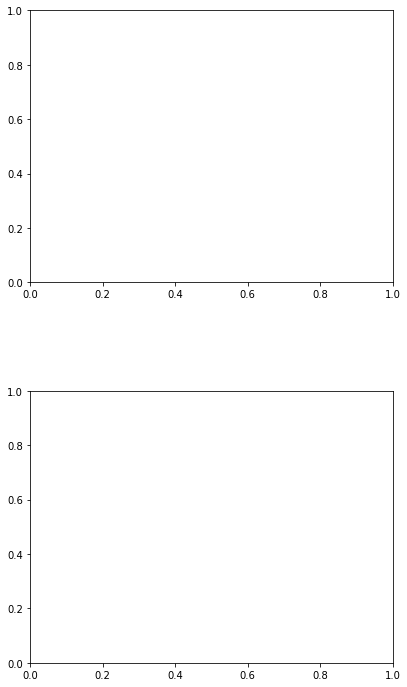

In [42]:
column_name = 'What areas do you need help with Select all that apply'
expected_values = [
	'None', 'Whole franchising process', 'Business plan', 'Financial processes', 
	'Competitors analysis', 'Legal documentation', 'Licensing documentation', 
	'Marketing', 'Quality Assurance', 'Franchisee training processes', 'Technical support'
]
plot_multichoice_with_other(series=past_df[column_name], main_values=expected_values, top=2)

## Analyse current clients

In [45]:
column_name = 'Have you hired Big Sky Franchise Team'
now_df = df[df[column_name] == 'Currently hired']

### 2. How likely would you recommend Big Sky Franchise Team to a friend or colleague? 

Mean value is 9.4


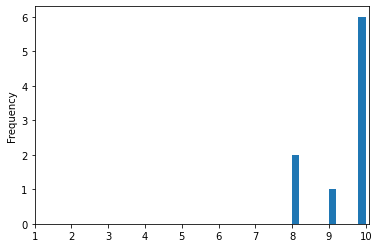

In [47]:
column_name = 'How likely would you recommend Big Sky Franchise Team to a friend or colleague 1 is not at all likely and 10 is extremelylikely'
plot_1_10_hist_chart(now_df[column_name])

### 3. If you were to do it all over, would you hire Big Sky again?

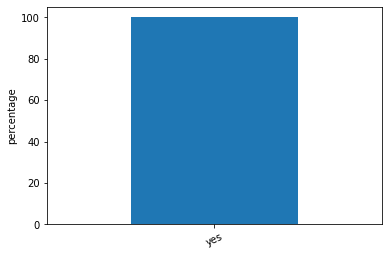

In [48]:
column_name = 'If you were to do it all over would you hire Big Sky again'
plot_bar_chart(ExtendedSeries(now_df[column_name]).filter_out_nan())

### 4. If no, could you please tell why?

All keywords:
Counter({'na': 9})


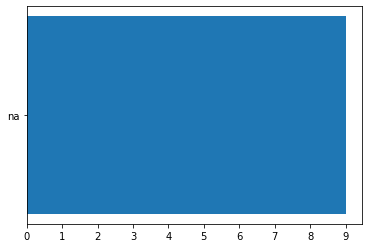

In [49]:
column_name = 'If no could you please tell why'
plot_text_answer(now_df[column_name], top=3)

### 5. What year did you start franchising?

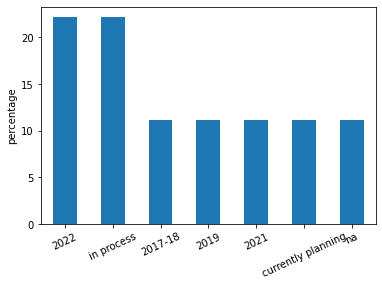

In [50]:
column_name = 'What year did you start franchising'
plot_bar_chart(now_df[column_name])

### 6. How many total franchises have you sold sold since you started franchising?

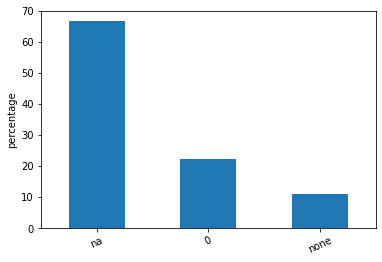

In [51]:
column_name = 'How many total franchises have you sold since you started franchisingif not applicable enter NA'
plot_bar_chart(now_df[column_name])

### 10. What were your biggest challenges or obstacles to launching your franchise program?

All keywords:
Counter({'na': 2, 'consultant': 1, 'franchise': 1, 'documents': 1, 'brand': 1, 'house': 1, 'person': 1, 'budget': 1, 'process': 1, 'set': 1, 'program': 1, 'workload': 1})


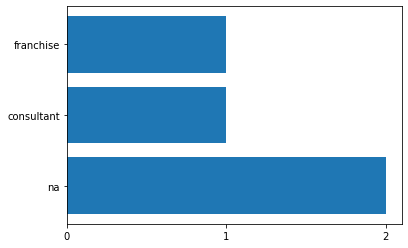

In [52]:
column_name = 'What were your biggest challenges or obstacles to launching your franchise program'
plot_text_answer(now_df[column_name], top=3)

### 11. What were your biggest challenges to selling franchises?

All keywords:
Counter({'na': 7, 'generation': 1, 'lead': 1, 'phase': 1})


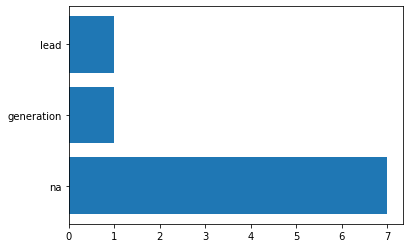

In [53]:
column_name = 'What were your biggest challenges to selling franchises'
plot_text_answer(now_df[column_name], top=3)

### 12. What have been your biggest challenges in supporting your franchisees

All keywords:
Counter({'no_response': 6, 'na': 5, 'answer': 1, 'partners': 1})


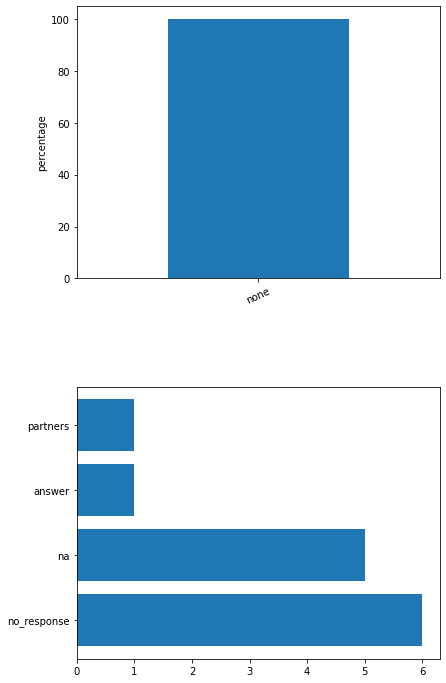

In [54]:
column_name = 'What have been your biggest challenges in supporting your franchisees select all that apply2'
expected_values = [
	'None', 'Their motivation', 'They did not follow system', 'Their finances and financial management', 
	'Lack of marketing spend by franchisee', 'Quality issues', 
	'My (or franchisor) coaching skills', 'Miscommunication'
]
plot_multichoice_with_other(series=now_df[column_name], main_values=expected_values, top=5)

### 13. What areas do you need help with?

No Data for bar chart


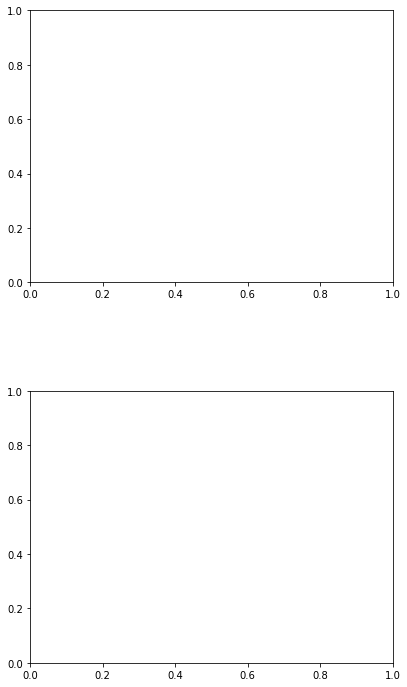

In [55]:
column_name = 'What areas do you need help with Select all that apply'
expected_values = [
	'None', 'Whole franchising process', 'Business plan', 'Financial processes', 
	'Competitors analysis', 'Legal documentation', 'Licensing documentation', 
	'Marketing', 'Quality Assurance', 'Franchisee training processes', 'Technical support'
]
plot_multichoice_with_other(series=now_df[column_name], main_values=expected_values, top=2)